Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Todsavad Tangtortan"
ID = "123012"

---

# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

### Example 1: Root finding for cubic polynomial 

In [3]:
def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

In [4]:
n = 200
x = np.linspace(-3, 3, n)  

# Create the polynomial f(x) = x^3 + x^2 
p = np.poly1d([1, 1, 0, 0]) # [x^3, x^2, x^1, 1]

# Derivative of a polynomial
# This is a convenient method to obtain p_d = np.poly1d([3, 2, 0])
p_d = np.polyder(p)
print('p derivative:', p_d)
print('p derivative:', p_d[2], p_d[1], p_d[0])

# Get values for f(x) and f'(x) for graphing purposes
y = fx(x, p)
y_d = fx(x,p_d)

p derivative:    2
3 x + 2 x
p derivative: 3 2 0


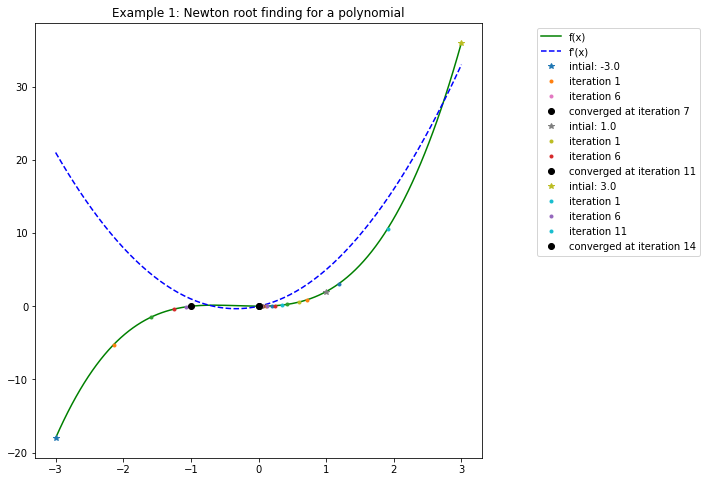

In [5]:
# Try three possible guesses for x0
x0_arr = [-3.0, 1.0, 3.0]
max_iter = 30
threshold = 0.001
roots = []

fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f\'(x)")

for x0 in x0_arr:
    # Plot initial data point
    plt.plot(x0, fx(x0,p), '*', label='intial: ' + str(x0))    
    i = 0
    while i < max_iter:
        # x1 = x0 - f(x0)/f'(x0)
        x1 = x0 - fx(x0, p) / fx(x0, p_d)
        # Check for delta (x) less than threshold
        if np.abs(x0 - x1) <= threshold:
            roots.append(round(x1,4))
            break;
        # Plot current root after every 5 iterations
        if i % 5 == 0:
            plt.plot(x1, fx(x1, p), '.', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1, p), '.')        
        x0 = x1
        i = i + 1
    plt.plot(x1, fx(x1, p), 'ko', label='converged at iteration '+ str(i+1))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 1: Newton root finding for a polynomial')

plt.show()

#### Example 2: Root finding for sine function

In [6]:
def fx_sin(x):  
    f_x = np.sin(x)        
    return f_x

def fx_dsin(x):    
    return np.cos(x)

In [7]:
n = 200

x = np.linspace(-np.pi, np.pi, n)  

# Get f(x) and f'(x) for plotting
y = fx_sin(x)
y_d = fx_dsin(x)

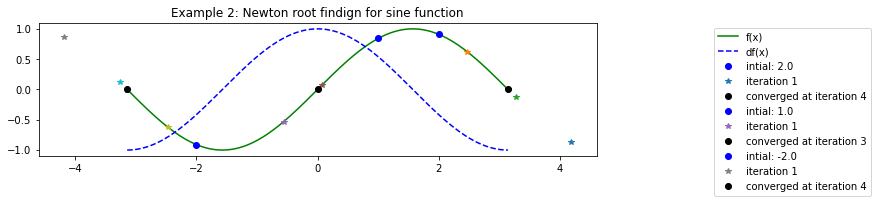

Roots: 3.141593, 0.000000, -3.141593


In [8]:
# Consider three possible starting points
x0_arr = [2.0, 1.0, -2.0]
max_iter = 30
i = 0
threshold = 0.01
roots = []

fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

for x0 in x0_arr:
    plt.plot(x0, fx_sin(x0), 'bo', label='intial: ' + str(x0))
    i = 0;
    while i < max_iter:
        x1 = x0 - fx_sin(x0) / fx_dsin(x0)
        if np.abs(x0 - x1) <= threshold:
            roots.append(x1)
            plt.plot(x1,fx_sin(x1),'ko',label='converged at iteration '+ str(i))
            break;
        if i % 5 == 0:
            plt.plot(x1, fx_sin(x1), '*', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx_sin(x1), '*')        
        x0 = x1
        i = i + 1

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 2: Newton root findign for sine function')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))


## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

Generate 100 samples for each of the classes.

### Exercise 1.1 (5 points)

Generate data for class 1 with 100 samples

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html">numpy.random.multivariate_normal</a> to generate samples.
</details>

In [9]:
mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100

cov_mat = None
X1 = None

# YOUR CODE HERE
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
X1 = np.random.multivariate_normal(mean=mu_1, cov=cov_mat, size=num_sample)
# raise NotImplementedError()

In [10]:
print(X1[:5])

# Test function: Do not remove
assert X1.shape == (100, 2), 'Size of X1 is incorrect'
assert cov_mat.shape == (2, 2), 'Size of x_test is incorrect'
count = 0 
for i in range(2):
    for j in range(2):
        if i==j and cov_mat[i,j] != 0:
            if cov_mat[i,j] == sigma_1:
                count += 1
        else:
            if cov_mat[i,j] == 0:
                count += 1
assert count == 4, 'cov_mat data is incorrect'

print("success!")
# End Test function

[[-0.09818721  3.09677647]
 [ 1.68290869  3.77644903]
 [-1.17905724  1.03118218]
 [ 0.53712516  3.36764334]
 [ 0.4760098   1.2945683 ]]
success!


**Expect result (or looked alike):**\
[[-0.48508229  2.65415886]\
 [ 1.17230227  1.61743589]\
 [-0.61932146  3.53986541]\
 [ 0.70583088  1.45944356]\
 [-0.93561505  0.2042285 ]]

### Exercise 1.2 (5 points)

Generate data for class 2 with 100 samples

$$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html">numpy.random.uniform</a> and/or <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">numpy.random.normal</a> to generate samples.
</details>

In [11]:
# 1. Create sample angle from 0 to 2pi with 100 samples
angle = None
# 2. Create sample with normal distribution of d with mean and variance
d =  None
# 3 Create X2
X2 = None

# YOUR CODE HERE
angle = np.random.uniform(0,2*np.pi,num_sample) 
#random.uniform(low=0.0, high=1.0, size=None)
d = np.random.normal(np.square(3*sigma_1),np.square(0.5*sigma_1),num_sample) 
#random.normal(loc=0.0, scale=1.0, size=None)
X2 = np.array([X1[:,0]+d*np.cos(angle), X1[:,1]+d*np.sin(angle)]).T
# raise NotImplementedError()

In [12]:
print('angle:',angle[:5])
print('d:', d[:5])
print('X2:', X2[:5])

# Test function: Do not remove
assert angle.shape == (100,) or angle.shape == (100,1) or angle.shape == 100, 'Size of angle is incorrect'
assert d.shape == (100,) or d.shape == (100,1) or d.shape == 100, 'Size of d is incorrect'
assert X2.shape == (100,2), 'Size of X2 is incorrect'
assert angle.min() >= 0 and angle.max() <= 2*np.pi, 'angle generate incorrect'
assert d.min() >= 8 and d.max() <= 10, 'd generate incorrect'
assert X2[:,0].min() >= -13 and X2[:,0].max() <= 13, 'X2 generate incorrect'
assert X2[:,1].min() >= -10 and X2[:,1].max() <= 13.5, 'X2 generate incorrect'

print("success!")
# End Test function

angle: [4.66634071 2.3902624  3.47241413 0.49485431 5.84942877]
d: [8.99615768 8.403968   9.01326006 8.91793529 9.38559819]
X2: [[-0.51229835 -5.88984498]
 [-4.45855539  9.51309413]
 [-9.70358075 -1.8965056 ]
 [ 8.38524629  7.6028015 ]
 [ 8.99243918 -2.65003358]]
success!


**Expect result (or looked alike):**\
angle: [4.77258271 3.19733552 0.71226709 2.11244845 6.06280915]\
d: [9.13908279 8.84218552 9.24427852 8.74831667 8.85727588]\
X2: [[ 0.064701   -6.46837219]\
 [-7.65614929  1.12480234]\
 [ 6.37750805  9.58147629]\
 [-3.80438416  8.95550952]\
 [ 7.70745021 -1.73194274]]

### Exercise 1.3 (5 points)

Combine X1 and X2 into single dataset

In [13]:
# 1. concatenate X1, X2 together
X = None
# 2. Create y with class 1 as 0 and class 2 as 1
y = None

# YOUR CODE HERE
X = np.concatenate([X1,X2],axis=0)
y = np.append(np.zeros(num_sample), np.ones(num_sample))
# raise NotImplementedError()

In [14]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

# Test function: Do not remove
assert X.shape == (200, 2), 'Size of X is incorrect'
assert y.shape == (200,) or y.shape == (200,1) or y.shape == 200, 'Size of y is incorrect'
assert y.min() == 0 and y.max() == 1, 'class type setup is incorrect'

print("success!")
# End Test function

shape of X: (200, 2)
shape of y: (200,)
success!


**Expect result (or looked alike):**\
shape of X: (200, 2)\
shape of y: (200, 1)

### Exercise 1.4 (5 points)

Plot the graph between class1 and class2 with **difference color and point style**.

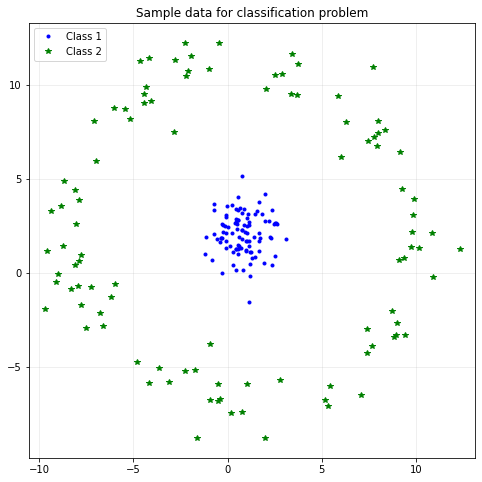

In [15]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here
# YOUR CODE HERE
plt.plot(X1[:,0], X1[:,1], 'b.', label= 'Class 1')
plt.plot(X2[:,0], X2[:,1], 'g*', label = 'Class 2')
plt.legend(loc=2)
# raise NotImplementedError()
# end plot graph
plt.axis('equal')
plt.show()

**Expect result (or looked alike):**

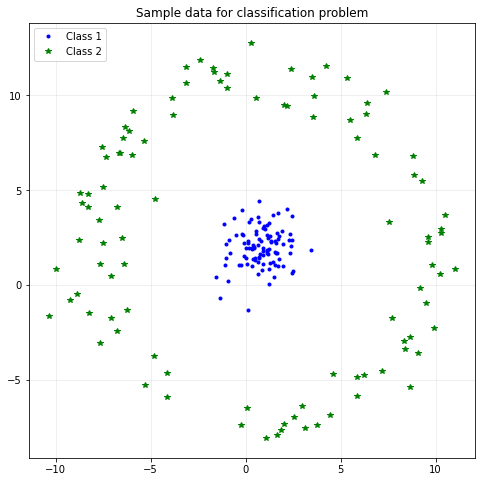

### Exercise 1.5 (5 points)

Split data into training and test datasets with 80% of training set and 20% of test set

In [16]:
X.shape[0], len(X)

(200, 200)

In [17]:
train_size = 0.8

idx_train = None
idx_test = None

X_train = None
X_test = None
y_train = None
y_test = None

# YOUR CODE HERE
idx = np.arange(0,X.shape[0])
np.random.shuffle(idx)

m_train = int(X.shape[0] * train_size)

idx_train = idx[0:m_train] 
idx_test = idx[m_train:]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

# raise NotImplementedError()

In [18]:
print('idx_train:', idx_train[:10])
print("train size, X:", X_train.shape, ", y:", y_train.shape)
print("test size,  X:", X_test.shape,  ", y:", y_test.shape)

# Test function: Do not remove
assert X_train.shape == (160, 2), 'Size of X_train is incorrect'
assert y_train.shape == (160,) or y_train.shape == (160,1) or y.shape == 160, 'Size of y_train is incorrect'
assert X_test.shape == (40, 2), 'Size of X_test is incorrect'
assert y_test.shape == (40,) or y_test.shape == (40,1) or y.shape == 40, 'Size of y_test is incorrect'

print("success!")
# End Test function

idx_train: [104 174  54 106 167  81 122  22   0  48]
train size, X: (160, 2) , y: (160,)
test size,  X: (40, 2) , y: (40,)
success!


**Expect reult (Or looked alike):**\
idx_train: [ 78  61  28 166  80 143   6  76  98 133]\
train size, X: (160, 2) , y: (160, 1) \
test size,  X: (40, 2) , y: (40, 1)

### Exercise 1.6 (5 points)

Write the function which normalize X set

#### Practice yourself (No grade, but has extra score 3 points)

Try to use Jupyter notebook to write the normalize equation.

YOUR ANSWER HERE

In [19]:
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    X_norm = None
    # YOUR CODE HERE
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std
#     raise NotImplementedError()
    return X_norm

In [20]:
XX = normalization(X)

X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

# Add 1 at the first column of training dataset (for bias) and use it when training
X_design_train = np.insert(X_train_norm,0,1,axis=1)
X_design_test = np.insert(X_test_norm,0,1,axis=1)

m,n = X_design_train.shape

print(X_train_norm.shape)
print(X_design_train.shape)
print(X_test_norm.shape)
print(X_design_test.shape)

# Test function: Do not remove
assert XX[:,0].min() >= -2.5 and XX[:,0].max() <= 2.5, 'Does the XX is normalized?'
assert XX[:,1].min() >= -2.5 and XX[:,1].max() <= 2.5, 'Does the XX is normalized?'

print("success!")
# End Test function

(160, 2)
(160, 3)
(40, 2)
(40, 3)
success!


### Exercise 1.7 (10 points)

define class for logistic regression: batch gradient descent

The class includes:

 - **Sigmoid** function $$sigmoid(z) = \frac{1}{1+e^{-z}}$$
 - **Softmax** function $$softmax(z) = \frac{e^{z_i}}{\sum_n{e^z}}$$
 - **Hyperthesis (h)** function $$\hat{y} = h(X;\theta) = softmax(\theta . X)$$
 - **Gradient (Negative likelihood)** function $$gradient = - X . \frac{y-\hat{y}}{n}$$
 - **Cost** function $$cost = \frac{\sum{((-y\log{\hat{y}}) - ((1-y)\log{(1 - \hat{y})})})}{n}$$
 - **Gradient ascent** function
 - **Prediction** function
 - **Get accuracy** funciton

In [21]:
class Logistic_BGD:
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None
        # YOUR CODE HERE
        s = 1/(1+np.exp(-1*z))
#         raise NotImplementedError()
        return s

    def softmax(self, z):
        sm = None
        # YOUR CODE HERE
        z -= np.max(z)
        sm = np.exp(z)/np.sum(np.exp(z))
#         raise NotImplementedError()
        return sm
    
    def h(self,X, theta):
        hf = None
        # YOUR CODE HERE
        hf = self.sigmoid(np.dot(X,theta))
#         raise NotImplementedError()
        return hf
    
    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
        n = len(y)
        grad = 1/n * np.dot(X.T,(y_pred-y))
#         raise NotImplementedError()
        return grad
        
    def costFunc(self, theta, X, y):
        cost = None
        grad = None
        # YOUR CODE HERE
        n = len(y)
        y_pred = self.h(X,theta)
        error = (-y*np.log(y_pred))-((1-y)*np.log(1-y_pred))
        cost = 1/n * sum(error)
        grad = self.gradient(X,y,y_pred)
#         raise NotImplementedError()
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # 1. calculate cost, grad function
            cost, grad = None, None
            # 2. update new theta
            #theta = None
            # YOUR CODE HERE
            cost, grad = self.costFunc(theta, X, y)
            theta = theta - alpha * grad
#             raise NotImplementedError()
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hyperthesis function
        # 2. classify y_predict that what it should be class1 or class2
        # 3. append the output from prediction
        # YOUR CODE HERE
        for i in range(X.shape[0]):
            y1 = self.h(X[i],theta)
            if y1 >= 0.5:
                labels.append(1)
            else:
                labels.append(0)
#         raise NotImplementedError()
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        y_pred = self.predict(X, theta)
        correct = 0
        for i in range(0,len(y_pred)):
            if y[i] == y_pred[i]:
                correct+=1
        percent_correct = (float(correct)/len(y_pred))*100
#         raise NotImplementedError()
        return percent_correct

In [22]:
# Test function: Do not remove
lbgd = Logistic_BGD()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
out_x1 = lbgd.softmax(out_x1)
out_x2 = lbgd.softmax(out_x2)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.gradientAscent(test_x, test_y, test_t, 0.001, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.29708373, 0.19781153]], 5)), "gradientAscent function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.86896665, 5), "gradientAscent function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_c [0.87192491]
Minimum at iteration: 2
test_t_out [[0.29708373 0.19781153]]
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**\
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_c [0.87192491]\
Minimum at iteration: 2\
test_t_out [[0.29708373 0.19781153]]\
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]\
test_l [1 1 1 1 1 1]\
test_a 50.0

### Exercise 1.8 (5 points)

Training the data using Logistic_BGD class.
 - Input: X_design_train
 - Output: y_train
 - Use 50,000 iterations
 
Find the initial_theta yourself

In [23]:
alpha = 0.001
iterations = 50000

BGD_model = None
initial_theta = None
bgd_theta, bgd_cost = None, None

# YOUR CODE HERE 
BGD_model = Logistic_BGD()
initial_theta = np.ones(X_design_train.shape[1])
# initial_theta.shape
bgd_theta, bgd_cost = BGD_model.gradientAscent(X_design_train, y_train, initial_theta, alpha, iterations)
# raise NotImplementedError()

Minimum at iteration: 49999


[-0.16022628 -0.04585438  0.15688912]
50000
1.011591143091066


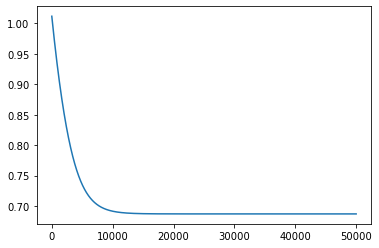

success!


In [24]:
print(bgd_theta)
print(len(bgd_cost))

print(bgd_cost[0])
plt.plot(bgd_cost)
plt.show()

# Test function: Do not remove
assert bgd_theta.shape == (X_train.shape[1] + 1,1) or bgd_theta.shape == (X_train.shape[1] + 1,) or bgd_theta.shape == X_train.shape[1] + 1, "theta shape is incorrect"
assert len(bgd_cost) == iterations, "cost data size is incorrect"

print("success!")
# End Test function

**Expect result (or look alike):**\
[[-0.07328673]\
 [-0.13632896]\
 [ 0.05430939]]\
50000

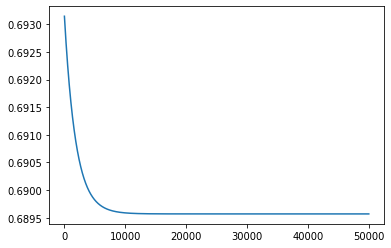

## In lab exercises

1. Verify that the gradient descent solution is correct. Plot the optimal decision boundary you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


### Exercise 1.9 (5 points)

Plot the optimal decision boundary of gradient ascent

In [25]:
def boundary_points(X, theta):
    theta = theta.reshape(-1,1)
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

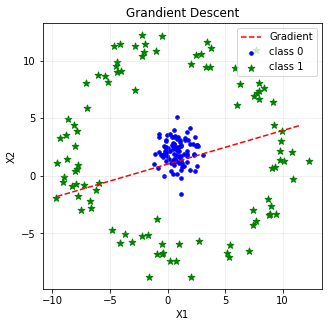

In [26]:
# YOUR CODE HERE
idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Grandient Descent')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='b', marker='.', label='class 0')
ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='g', marker='*', label='class 1')

point_1, point_2 = boundary_points(X, bgd_theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--', label='Gradient')
plt.legend(loc=0)
plt.show()
# raise NotImplementedError()

**Expect result (or look alike):**\
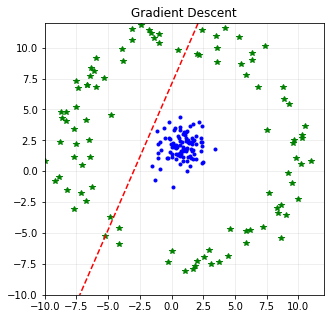

In [27]:
print("Accuracy =",BGD_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 50.0


### Exercise 2.1 (10 points)

Write Newton's method class

In [74]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None
        # YOUR CODE HERE
#         raise NotImplementedError()
        s = 1/(1+np.exp(-1*z))
        return s

    def h(self,X, theta):
        hf = None
        # YOUR CODE HERE
#         raise NotImplementedError()
        hf = self.sigmoid(np.dot(X,theta))
        return hf

    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
#         raise NotImplementedError()
        n = len(y)
        grad = 1/n * np.dot(X.T,(y_pred-y))
        return grad
        
        
    def hessian(self, X, y, theta):
        hess_mat = None
        # YOUR CODE HERE
        y_pred = self.h(X, theta) #sigmoid
#         X = X.reshape(-1,1) #convert 1d to 2d matrix
        hess_mat = ((y_pred.T @ (1-y_pred)) * (X.T @ X))/X.shape[0]
#         raise NotImplementedError()
        return hess_mat
        
    def costFunc(self, theta, X, y):   
        cost, grad = None, None
        # YOUR CODE HERE
#         raise NotImplementedError()
        n = len(y)
        y_pred = self.h(X,theta)
        error = (y * np.log(y_pred)) + ((1-y)*np.log(1-y_pred))
        cost = -1/n * sum(error) 
        grad = self.gradient(X, y, y_pred)
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            hessian_mat = self.hessian(X,y, theta)
#             print('theta',theta.shape)
#             print('hes',(np.linalg.inv(hessian_mat).shape))
            cost, grad = self.costFunc(theta, X, y)
#             print('grad',grad.shape)
            theta = theta - (np.linalg.pinv(hessian_mat) @ grad)
            #raise NotImplementedError()
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # YOUR CODE HERE
        for i in range(X.shape[0]):
            y1 = self.h(X[i],theta)
            if y1 >= 0.5:
                labels.append(1)
            else:
                labels.append(0)
#         raise NotImplementedError()
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        y_pred = self.predict(X, theta)
        correct = 0
        for i in range(0,len(y_pred)):
            if y[i] == y_pred[i]:
                correct+=1
        percent_correct = (float(correct)/len(y_pred))*100
#         raise NotImplementedError()
        return percent_correct

In [29]:
# Test function: Do not remove
lbgd = Logistic_NM()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_h = lbgd.hessian(test_x, test_y, test_t)
print('test_h', test_h)
assert test_h.shape == (2, 2), "hessian matrix function is incorrect"
assert np.array_equal(np.round(test_h.T, 5), np.round([[12.17334371, 6.55487738],[ 6.55487738, 14.84880387]], 5)), "hessian matrix function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.newtonsMethod(test_x, test_y, test_t, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.14765747, 0.15607017]], 5)), "newtonsMethod function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.7534506190845247, 5), "newtonsMethod function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_h [[12.17334371  6.55487738]
 [ 6.55487738 14.84880387]]
test_c [0.87192491]
Minimum at iteration: 2
test_t_out [[0.14765747 0.15607017]]
test_j [array([0.87192491]), array([0.79674844]), array([0.75345062])]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_h [[12.17334371  6.55487738]\
 [ 6.55487738 14.84880387]]\
test_c 0.8719249134773479\
Minimum at iteration: 2\
test_t_out [[0.14765747 0.15607017]]\
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845247]\
test_l [1 1 1 1 1 1]\
test_a 50.0

Minimum at iteration: 999
theta: [-0.1583352  -0.04392825  0.15861744]
1.011591143091066


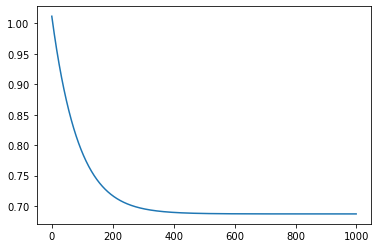

In [30]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_design_train, y_train, initial_theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

**Expect result (or look alike):**\
Minimum at iteration: 999\
theta: [[-0.07313861]\
 [-0.13605172]\
 [ 0.05419746]]\
0.6931471805599453

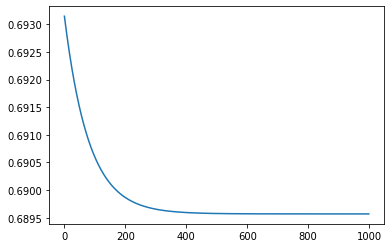

### Exercise 2.2 (5 points)

Plot the optimal decision boundary of Newton method

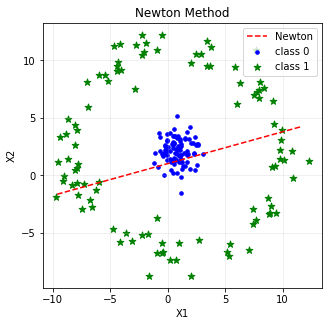

In [31]:
# YOUR CODE HERE
idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Newton Method')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='b', marker='.', label='class 0')
ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='g', marker='*', label='class 1')

point_1, point_2 = boundary_points(X, nm_theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--', label='Newton')
plt.legend(loc=0)
plt.show()
# raise NotImplementedError()

**Expect result (or look alike):**

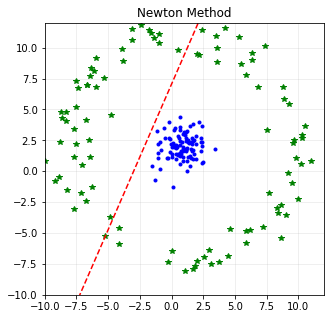

In [32]:
print("Accuracy =",NM_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 50.0


### Exercise 2.3 (5 points)

Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues with Newton's method such as a singular or nearly singular Hessian matrix?

YOUR ANSWER HERE

## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset. (5 points)

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation (10 points)
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03. (20 points)




### Performing Polar Transformations

In [33]:
# YOUR CODE HERE
# X = np.concatenate([X1,X2],axis=0)
# y = np.append(np.zeros(num_sample), np.ones(num_sample))

In [34]:
# Prepare data 
# Convert X to angle and radius 
df = pd.DataFrame(X, columns=['X0', 'X1'])
df['angles'] = np.arctan(df.X1 / df.X0)
df['radius'] = np.sqrt(df.X0 ** 2 + df.X1 ** 2)
df['y'] = y

newX = df[['angles', 'radius']].values
newX = np.insert(newX, 0, 1, axis=1)
X_train = newX[idx_train]
X_test = newX[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

Text(0, 0.5, 'radius')

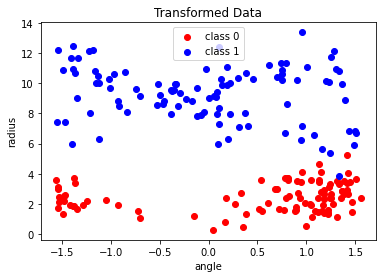

In [36]:
y0_df = df[df.y == 0]
y1_df = df[df.y == 1]

plt.title('Transformed Data')
plt.scatter(y0_df.angles, y0_df.radius, c='r', label='class 0')
plt.scatter(y1_df.angles, y1_df.radius, c='b', label='class 1')
plt.legend()
plt.xlabel('angle')
plt.ylabel('radius')

### Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method

In [37]:
alpha = 0.01
iterations = 10000
init_theta = np.ones(newX.shape[1])

lg = Logistic_BGD() 
theta, j_hist = lg.gradientAscent(X_train, y_train, init_theta, alpha, iterations)

Minimum at iteration: 9999


In [38]:
iterations = 800
init_theta = np.ones(newX.shape[1])

ln = Logistic_NM()
theta_n, j_hist_n = ln.newtonsMethod(X_train, y_train, init_theta, iterations)

Minimum at iteration: 799


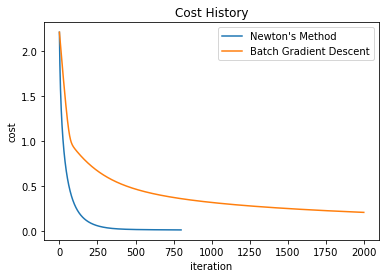

Minimum Cost for each method from polar transformation
Gradient Descent: 0.06742406969688722
Newton's Method : 0.01536431233563054


In [74]:
plt.plot(j_hist_n, label='Newton\'s Method')
plt.plot(j_hist[:2000], label='Batch Gradient Descent')
plt.title('Cost History')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.show()

print('Minimum Cost for each method from polar transformation')
print('Gradient Descent:', np.min(j_hist))
print('Newton\'s Method :', np.min(j_hist_n))

We can see that Newton's Method with using Hessian Matrix cause less iteration

### Apply Newton's method to the dataset you used for the take home exercises in Lab 03.

In [43]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [44]:
# Import the data
data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')
# Start to explore the data
print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train[:5])

Training data shape (614, 13)
Test data shape (367, 12)
Training data:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban         

In [45]:
# Now checking for the missing values of the train and test datasets

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


#### Handle missing values

In [46]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Now the number of examples missing the `Married` attribute is 0.

Excercise: Complete the data processing based on examples given and logistic regression model on training dataset. Estimate the Accuracy (goodness of fit) on test dataset.

In [47]:
# Another example of filling in missing values for the "number of dependents" attribute.
# Here we see that categorical values are all numeric except one value "3+" 
# Create a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)

data_train['Dependents'].replace('0', 0, inplace = True)
data_train['Dependents'].replace('1', 1, inplace = True)
data_train['Dependents'].replace('2', 2, inplace = True)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


Once missing values are filled in, you'll want to convert strings to numbers.

Finally, here's an example of replacing missing values for a numeric attribute. Typically, we would use the mean of the attribute over the training set. 

In [48]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


#### Cleaing Gender

In [49]:
#Training Data
print(data_train['Gender'].value_counts())

gender = data_train['Gender'].value_counts()
print('Elements in Gender variable', gender.shape)
print('Gender ratio ', gender[0]/sum(gender.values))

def fill_gender_status(data, male_num_train, female_num_train):    
    data['Gender'].fillna('Male',inplace=True, limit = male_num_train )
    data['Gender'].fillna('Female',inplace=True, limit = female_num_train)  

fill_gender_status(data_train,11,2) #Obtained by multiplying the ratios to the total value
print(data_train['Gender'].value_counts()) 
print('Missing values Gender for train data:', data_train.Gender.isnull().sum())

print()
#Test Data
print(data_test['Gender'].value_counts())

gender = data_test['Gender'].value_counts()
print('Elements in Gender variable', gender.shape)
print('Gender ratio ', gender[0]/sum(gender.values))

fill_gender_status(data_test,9,2) #Calcuated using the ratio to the total missing values
print(data_test['Gender'].value_counts()) 
print('Missing values Gender for test data:', data_test.Gender.isnull().sum())

Male      489
Female    112
Name: Gender, dtype: int64
Elements in Gender variable (2,)
Gender ratio  0.8136439267886856
Male      500
Female    114
Name: Gender, dtype: int64
Missing values Gender for train data: 0

Male      286
Female     70
Name: Gender, dtype: int64
Elements in Gender variable (2,)
Gender ratio  0.8033707865168539
Male      295
Female     72
Name: Gender, dtype: int64
Missing values Gender for test data: 0


#### Cleaing Self_Employed

In [50]:
#Training Data
print(data_train['Self_Employed'].value_counts())

self_employed = data_train['Self_Employed'].value_counts()
print('Elements in Self Employed variable', self_employed.shape)
print('Self Employed ratio ', self_employed[0]/sum(self_employed.values))

def fill_selfemployed_status(data, yes_num_train, no_num_train):        
    data['Self_Employed'].fillna('No', inplace = True, limit = yes_num_train)
    data['Self_Employed'].fillna('Yes', inplace = True, limit = no_num_train)  

fill_selfemployed_status(data_train, 27, 5)
print(data_train['Self_Employed'].value_counts()) 
print('Missing values Self_Employed for train data:', data_train['Self_Employed'].isnull().sum())

print()
#Test Data
print(data_test['Self_Employed'].value_counts())

self_employed = data_test['Self_Employed'].value_counts()
print('Elements in Self_Employed variable', self_employed.shape)
print('Self-Employed ratio ', self_employed[0]/sum(self_employed.values))

fill_selfemployed_status(data_test, 19, 4)
print(data_test['Self_Employed'].value_counts()) 
print('Missing values Self_Employed for test data:', data_test['Self_Employed'].isnull().sum())

No     500
Yes     82
Name: Self_Employed, dtype: int64
Elements in Self Employed variable (2,)
Self Employed ratio  0.8591065292096219
No     527
Yes     87
Name: Self_Employed, dtype: int64
Missing values Self_Employed for train data: 0

No     307
Yes     37
Name: Self_Employed, dtype: int64
Elements in Self_Employed variable (2,)
Self-Employed ratio  0.8924418604651163
No     326
Yes     41
Name: Self_Employed, dtype: int64
Missing values Self_Employed for test data: 0


#### Clean Loan_Amount_Term

In [51]:
#Training Data
print(data_train['Loan_Amount_Term'].value_counts())

LoanAmt = data_train['Loan_Amount_Term'].value_counts()

print('mean loan amount term ', np.mean(data_train["Loan_Amount_Term"]))

loan_amount_meant = np.mean(data_train["Loan_Amount_Term"])
loan_amount_meant
data_train['Loan_Amount_Term'].fillna(loan_amount_meant, inplace=True, limit = 14) #Replacing all the values with the mean i.e. 314
# data_test['Loan_Amount_Term'].fillna(loan_amount_meant, inplace=True, limit = 5)
print(data_train['Loan_Amount_Term'].value_counts())

print('Missing values Loan_Amount_Term for train data:', data_train['Loan_Amount_Term'].isnull().sum())

print()
#Test Data

print(data_test['Loan_Amount_Term'].value_counts())

LoanAmt = data_test['Loan_Amount_Term'].value_counts()

print('mean loan amount term ', np.mean(data_test["Loan_Amount_Term"]))

loan_amount_meant = np.mean(data_test["Loan_Amount_Term"])
loan_amount_meant
#data_train['Loan_Amount_Term'].fillna(loan_amount_meant, inplace=True, limit = 14) #Replacing all the values with the mean i.e. 314
data_test['Loan_Amount_Term'].fillna(loan_amount_meant, inplace=True, limit = 6)
print(data_test['Loan_Amount_Term'].value_counts())

print('Missing values Loan_Amount_Term for test data:', data_test['Loan_Amount_Term'].isnull().sum())


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
mean loan amount term  342.0
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Missing values Loan_Amount_Term for train data: 0

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64
mean loan amount term  342.53739612188366
360.000000    311
180.000000     22
480.000000      8
300.000000      7
342.537396      6
240.000000      4
84.000000       3
6.000000        1
120.000000      1
36.000000       1
350.000000      1
12.000000       1
60.000000       1
Name: Loan_Amount_Term, dtype: int64
Missing values Loan_Amount_Term for test data: 0


#### Clean Credit_History

In [52]:
#Training Data
print(data_train['Credit_History'].value_counts())

credit = data_train['Credit_History'].value_counts()
print('Elements in Gender variable', credit.shape)
print('Credit ratio ', credit[0]/sum(credit.values))


def fill_credit_status(data, one_num_train, two_num_train):    
    data['Credit_History'].fillna(1.0,inplace=True, limit = one_num_train )
    data['Credit_History'].fillna(0.0,inplace=True, limit = two_num_train)  

fill_credit_status(data_train,42,8) #Calcuated using the ratio to the total missing values
print(data_train['Credit_History'].value_counts()) 
print('Missing values Credit_History for train data:', data_train['Credit_History'].isnull().sum())

print()
#Test Data
print(data_test['Credit_History'].value_counts())

credit = data_test['Credit_History'].value_counts()
print('Elements in Gender variable', credit.shape)
print('Credit ratio ', credit[0]/sum(credit.values))

fill_credit_status(data_test,24,5) #Calcuated using the ratio to the total missing values
print(data_test['Credit_History'].value_counts()) 
print('Missing values Credit_History for test data:', data_test['Credit_History'].isnull().sum())

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Elements in Gender variable (2,)
Credit ratio  0.15780141843971632
1.0    517
0.0     97
Name: Credit_History, dtype: int64
Missing values Credit_History for train data: 0

1.0    279
0.0     59
Name: Credit_History, dtype: int64
Elements in Gender variable (2,)
Credit ratio  0.17455621301775148
1.0    303
0.0     64
Name: Credit_History, dtype: int64
Missing values Credit_History for test data: 0


In [53]:
# Cleaning training set and test set 
print('Missing values for train data \n ------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data 
 ------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#### Converting categorical value to numerical value

In [54]:
data_train['Gender'].replace('Male', 0, inplace = True)
data_train['Gender'].replace('Female', 1, inplace = True)
data_train['Married'].replace('No', 0, inplace = True)
data_train['Married'].replace('Yes', 1, inplace = True)
data_train['Education'].replace('Not Graduate', 0, inplace = True)
data_train['Education'].replace('Graduate', 1, inplace = True)
data_train['Self_Employed'].replace('No', 0, inplace = True)
data_train['Self_Employed'].replace('Yes', 1, inplace = True)
data_train['Property_Area'].replace('Urban', 0, inplace = True)
data_train['Property_Area'].replace('Semiurban', 1, inplace = True)
data_train['Property_Area'].replace('Rural', 2, inplace = True)
data_train['Loan_Status'].replace('N', 0, inplace = True)
data_train['Loan_Status'].replace('Y', 1, inplace = True)

In [55]:
data_test['Gender'].replace('Male', 0, inplace = True)
data_test['Gender'].replace('Female', 1, inplace = True)
data_test['Married'].replace('No', 0, inplace = True)
data_test['Married'].replace('Yes', 1, inplace = True)
data_test['Education'].replace('Not Graduate', 0, inplace = True)
data_test['Education'].replace('Graduate', 1, inplace = True)
data_test['Self_Employed'].replace('No', 0, inplace = True)
data_test['Self_Employed'].replace('Yes', 1, inplace = True)
data_test['Property_Area'].replace('Urban', 0, inplace = True)
data_test['Property_Area'].replace('Semiurban', 1, inplace = True)
data_test['Property_Area'].replace('Rural', 2, inplace = True)
data_test['Dependents'] = data_test['Dependents'].astype(str).astype(int)

In [56]:
data_train.dtypes, data_test.dtypes
#Dependent of Test is still not be a numerical value 

(Loan_ID               object
 Gender                 int64
 Married                int64
 Dependents             int64
 Education              int64
 Self_Employed          int64
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area          int64
 Loan_Status            int64
 dtype: object,
 Loan_ID               object
 Gender                 int64
 Married                int64
 Dependents             int64
 Education              int64
 Self_Employed          int64
 ApplicantIncome        int64
 CoapplicantIncome      int64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area          int64
 dtype: object)

#### Setup X and Y data

In [57]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
X_data = data_train.iloc[:,1:11].to_numpy() #10 Columns
y_data = data_train.iloc[:,-1].to_numpy() #Loan_Status
# print(y.shape)
m,n = X_data.shape
# y = y.reshape(m,1)
# print(m,n)
X_data.shape,y_data.shape

((614, 10), (614,))

In [64]:
percent_train = .6

def partition(X, y, percent_train):
    # 1. create index list
    idx = np.arange(0,y.shape[0])
    random.seed(1412)   # just make sure the shuffle always the same please do not remove
    # do yourself follow the instruction
    # 2. shuffle index
    random.shuffle(idx)
    # 3. Create train/test index
    percent_train = 0.6
    m_train = int(y.shape[0] * percent_train)
    train_idx = idx[:m_train] #0-60 
    test_idx = idx[m_train:] #61-100
    print(f'{train_idx.shape, test_idx.shape = }')
    # 4. Separate X_Train, y_train, X_test, y_test
    X_train = None
    y_train = None
    X_test = None
    y_test = None
    # YOUR CODE HERE
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
#     raise NotImplementedError()
    return idx, X_train, y_train, X_test, y_test

idx, X_train, y_train, X_test, y_test = partition(X_data, y_data, percent_train)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

train_idx.shape, test_idx.shape = ((368,), (246,))
(368, 10)
(368,)
(246, 10)
(246,)


In [60]:
def normalized_data(data): #Z-value
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    z = (data - means) / stds
    return z

[[-0.51861886  0.72592765  0.94899076  0.53545615 -0.39652579 -0.5410386
   0.03324183 -0.40235495  0.27205825  0.43696511]
 [ 1.92819831 -1.37754775 -0.72195948  0.53545615 -0.39652579 -0.33491052
  -0.52133628 -0.05562615  0.27205825  0.43696511]
 [-0.51861886  0.72592765  0.94899076  0.53545615 -0.39652579 -0.31425281
   0.80965117  1.38463193  0.27205825  0.43696511]
 [-0.51861886  0.72592765  0.94899076 -1.86756657 -0.39652579 -0.34860749
   0.34036959  0.06439535  0.27205825  0.43696511]
 [ 1.92819831 -1.37754775  0.11351564 -1.86756657 -0.39652579  0.06319958
  -0.52133628 -0.09563332  0.27205825  0.43696511]]


In [67]:
X_norm_train = normalized_data(X_train)
X_norm_test = normalized_data(X_test)
X_norm_train = np.insert(X_norm_train, 0, 1, axis=1)
X_norm_test = np.insert(X_norm_test, 0, 1, axis=1)

In [68]:
X_norm_train.shape, X_norm_test.shape

((368, 11), (246, 11))

##### Newton's Method

In [75]:
# apply newton method with Lab 3 dataset 
iterations = 1000
init_theta = np.ones(X_norm_train.shape[1])

ln_lab = Logistic_NM()
theta_nlab, j_hist_nlab = ln_lab.newtonsMethod(X_norm_train, y_train, init_theta, iterations)

Minimum at iteration: 999


In [84]:
print("Theta optimized:", theta_nlab)
print("Cost with optimized theta:", j_hist_nlab[-1])

Theta optimized: [ 0.91178355  0.10961297  0.25097737  0.15806978  0.16780959 -0.14936214
  0.5722959  -0.00987271 -0.12830946  0.10004655  1.18345031]
Cost with optimized theta: 0.5155953076447145


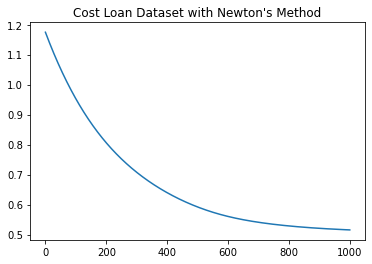

Train Set Accuracy From Lab3 dataset
Newton Accuracy :  78.80434782608695
Test Set Accuracy From Lab3 dataset
Newton Accuracy :  83.33333333333334


In [80]:
plt.title('Cost Loan Dataset with Newton\'s Method')
plt.plot(j_hist_nlab)
plt.show()

n_acc = ln_lab.getAccuracy(X_norm_train, y_train,theta_nlab)
print("Train Set Accuracy From Lab3 dataset")
print('Newton Accuracy : ', n_acc)

n_acc = ln_lab.getAccuracy(X_norm_test, y_test,theta_nlab)

print("Test Set Accuracy From Lab3 dataset")
print('Newton Accuracy : ', n_acc)

## The report

Write a brief report covering your experiments (both in lab and take home) and send as a Jupyter notebook
to the TAs, Manish and Abhishek before the next lab.

In your solution, be sure to follow instructions.

Import csv file from data_train and data_test:
data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

1. Handle missing values
- Filling missing values
    - From Training Data and Testing Data, some features  (Gender,Self_Employed,Loan_Amount_Term,Credit_History) are missing
- Converting categorical value to numerical value
    1. Gender, Married, Education, Self_Employed,Property_Area,Loan_Status in Training Data  
    2. Gender, Married, Dependents, Education, Self_Employed,Property_Area in Test Data 

2. Setup X and Y data
- Test Train Split Data as Training set and test set
- Normalized X Data 
- Insert intercept X0

3. Train data and return theta and J value
- Optimizing with Newthod's Method
- Plotting
- find accuracy

Conclusion: 

Part 1: To use any features, ML model is able to read data as number. Therefore, if there are any feature which is object, it has to be convert as int or float.

Part 2: There are 2 files thus no need to test train split data
- Normalzied Data X_train 
**DON'T* normalized Y data

Part 3: Train data and return theta and J value. Find the good $\alpha$ 
- All important functions are here
    - Sigmoid function
    - Hypothesis function
    - Gradient function
    - Hessian
    - Cost $j$ and Gradient descent Method
    - Newthod's Method 
    
- Ploting 
    Just only 1000 iteration using Newton's Method, the cost junction have down to the minimum already at value 0.52. 
    
    Therefore, Newton's Method got the congegence of cost faster than Gradient Descent method.
    
- Accuracy
    From training set, Accuracy has shown 78.80%.
    From testing set, Accuracy has shown 83.33%.
**NOTE: Test set doesn't have y_test